In [1]:
import numpy as np
import scipy.special as spec
import matplotlib.pyplot as plt
import scipy.stats as st
import math

1. X1, ..., Xn ∼ Bern(θ), θ ∼ R[0, 1]. Посчитать апостериорную плотность и построить ее график.

а) для выборок размера n = 5, 10, 20, 50, 100 для θ = 1/2, θ = 1/3;

[1 0 0 1 0]


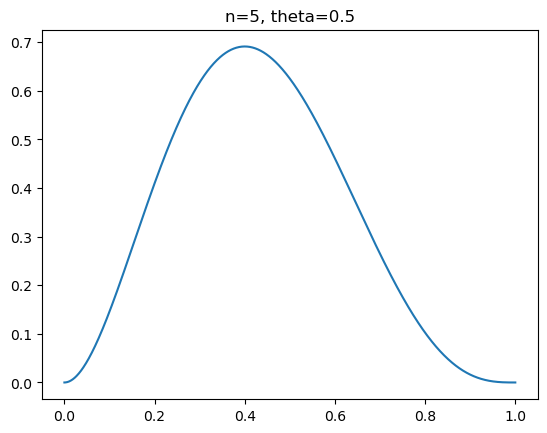

[1 0 0 0 1]


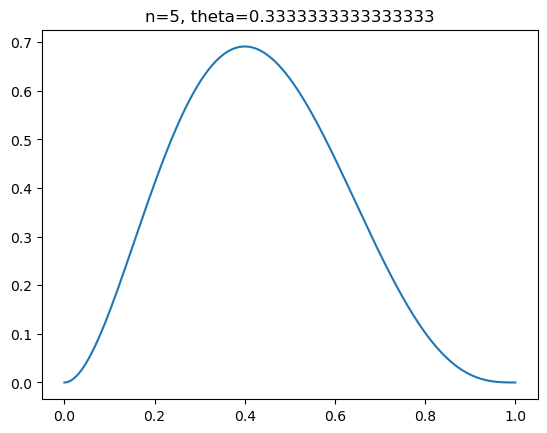

[0 0 1 1 1 0 0 0 1 0]


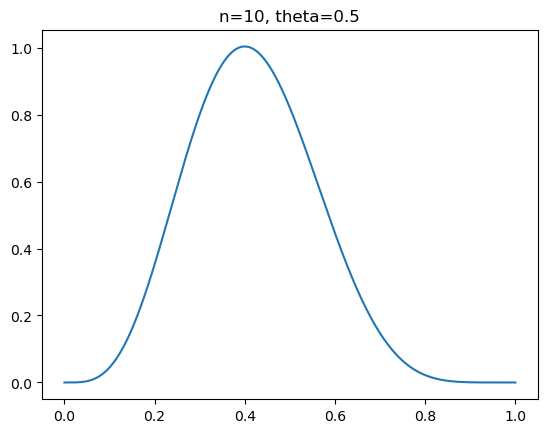

[0 0 0 0 1 1 0 0 0 1]


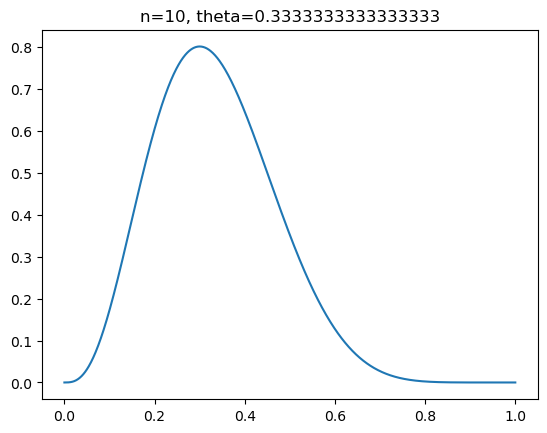

[0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1]


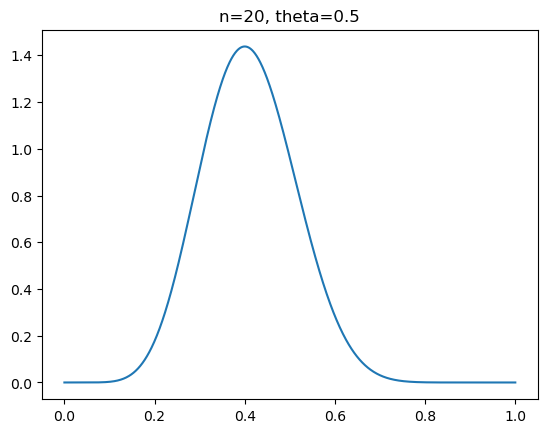

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]


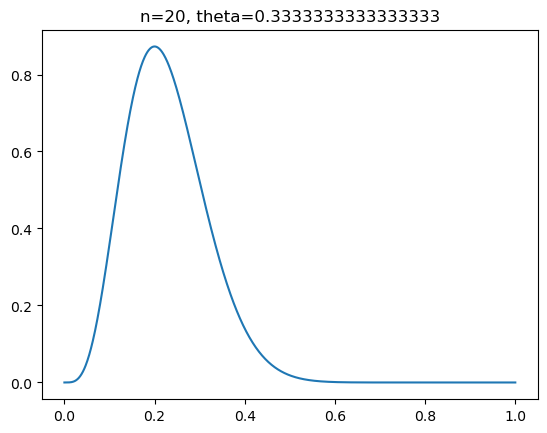

[1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 0 0 1 1 1 0 0]


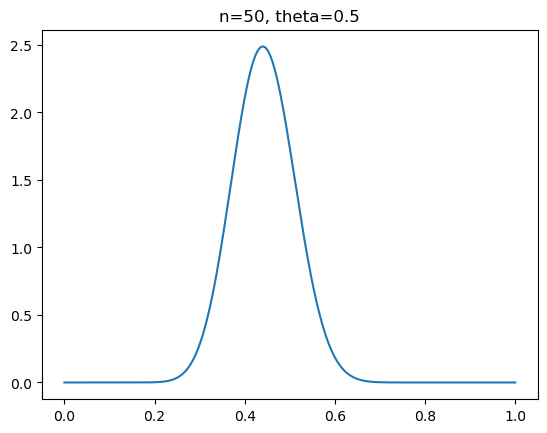

[0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 0 0 0 0 0 0 0]


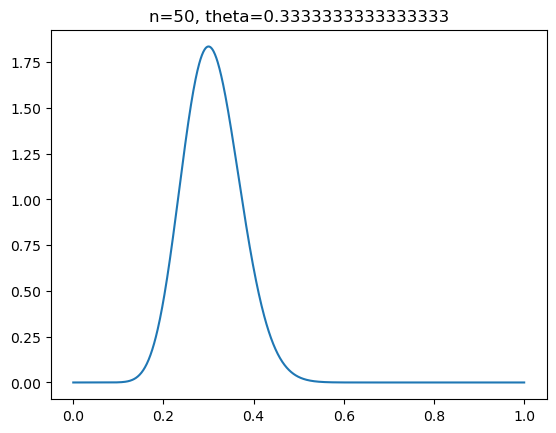

[0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1]


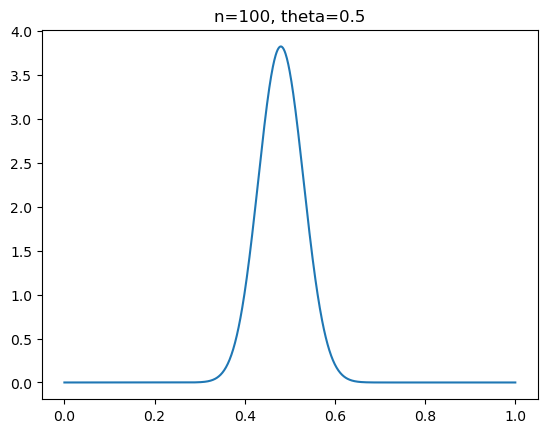

[0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]


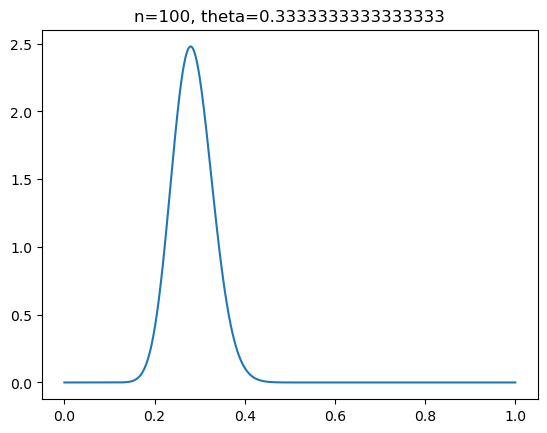

In [3]:
nmas=[5,10,20,50,100]
thetamas=[0.5,1/3]
for n in nmas:
	for theta in thetamas:
		X=np.random.binomial(1,theta,n)
		k=len([i for i in X if i==1])
		x=np.linspace(0,1,1000)
		denominator=spec.beta(n-k+1,k)
		print(X)
		plt.plot(x,x**k*(1-x)**(n-k)/denominator)
		plt.title("n="+str(n)+", theta="+str(theta))
		plt.show()

б) вместо генерации выборки положите sum i=1 to n Xi равной 9n/10 или 99n/100.

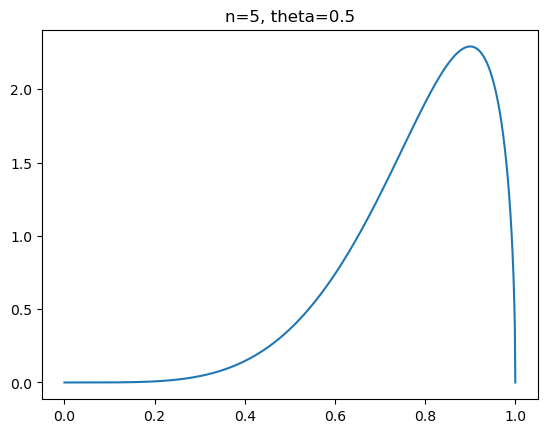

/var/folders/05/gtdbjdrs6z51grnhmq4r4_q40000gn/T/ipykernel_75344/427870973.py:13: RuntimeWarning: divide by zero encountered in power
  plt.plot(x,x**k*(1-x)**(n-k)/denominator)


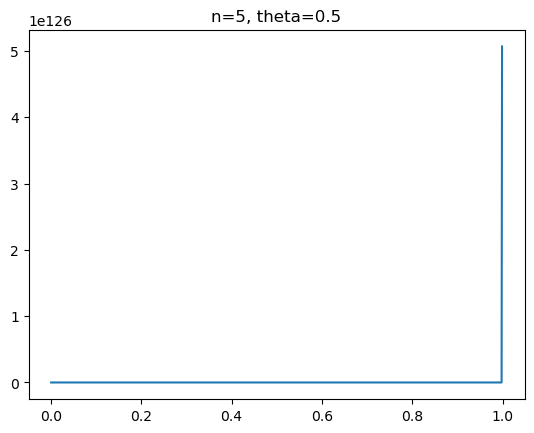

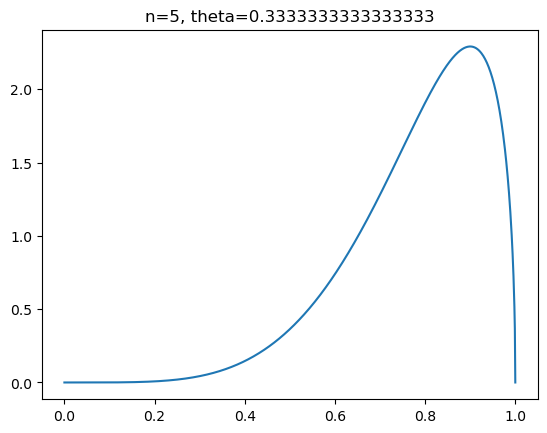

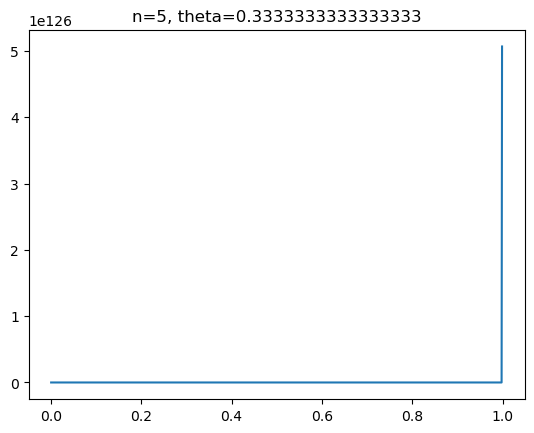

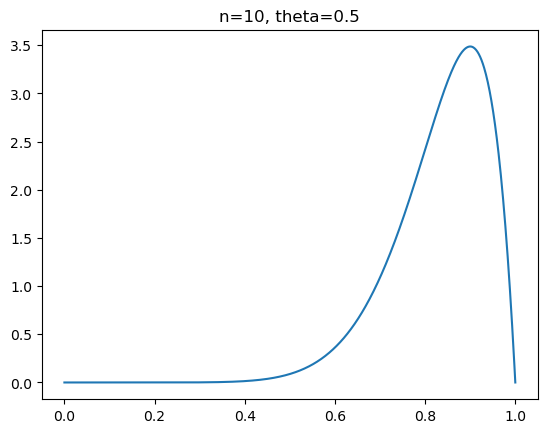

/var/folders/05/gtdbjdrs6z51grnhmq4r4_q40000gn/T/ipykernel_75344/427870973.py:13: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,x**k*(1-x)**(n-k)/denominator)


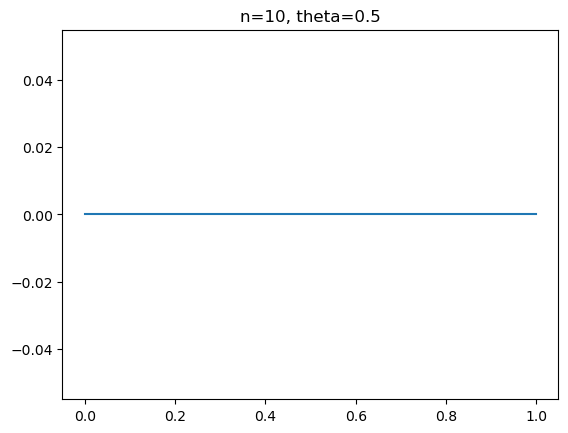

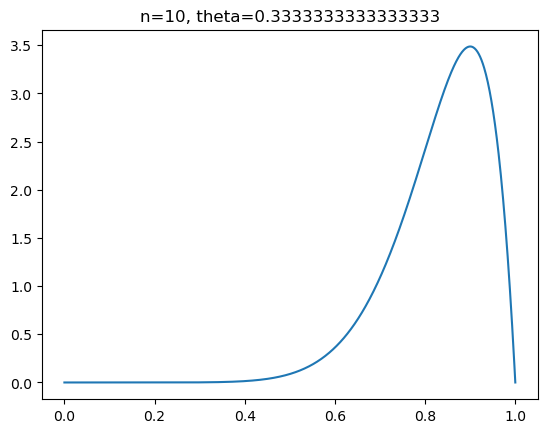

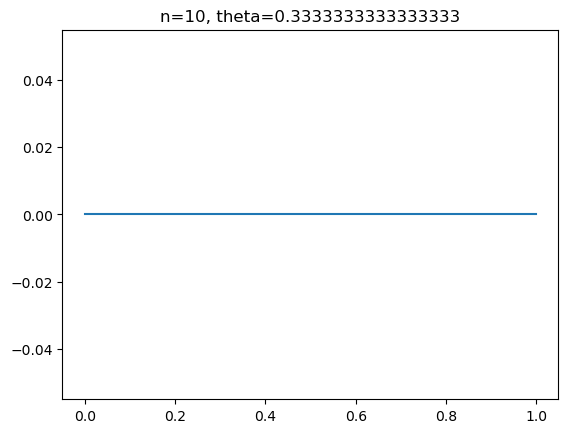

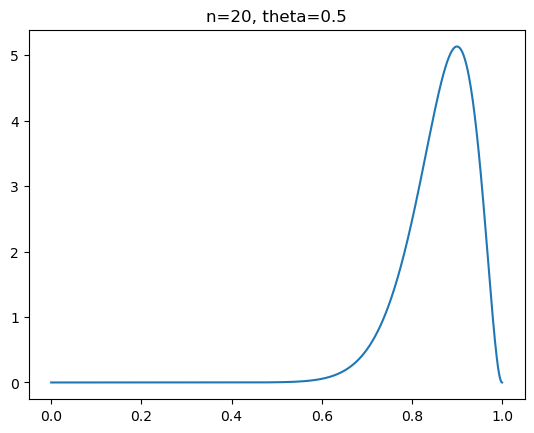

/var/folders/05/gtdbjdrs6z51grnhmq4r4_q40000gn/T/ipykernel_75344/427870973.py:13: RuntimeWarning: overflow encountered in power
  plt.plot(x,x**k*(1-x)**(n-k)/denominator)


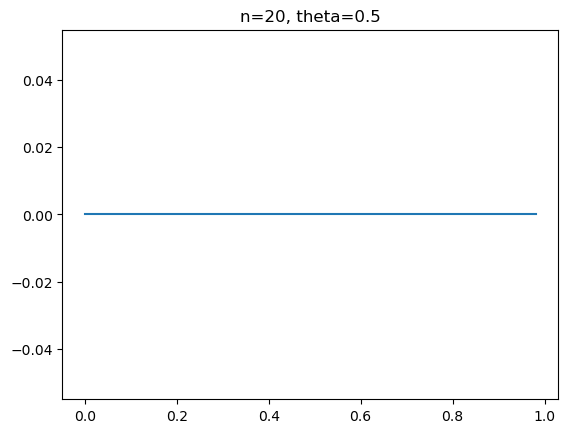

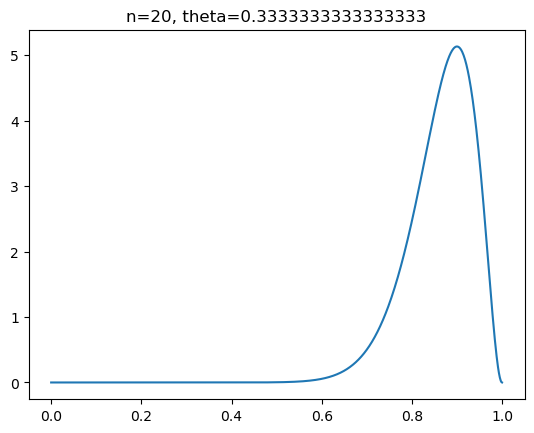

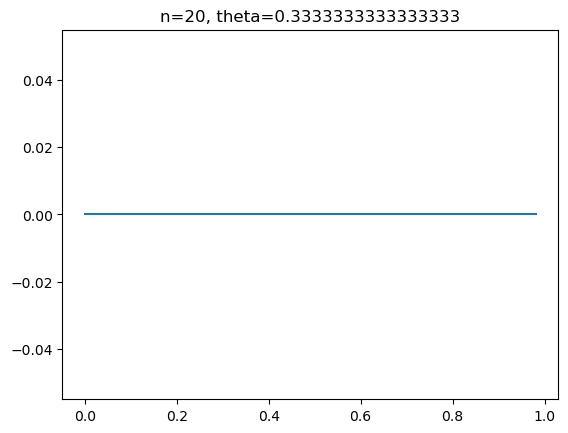

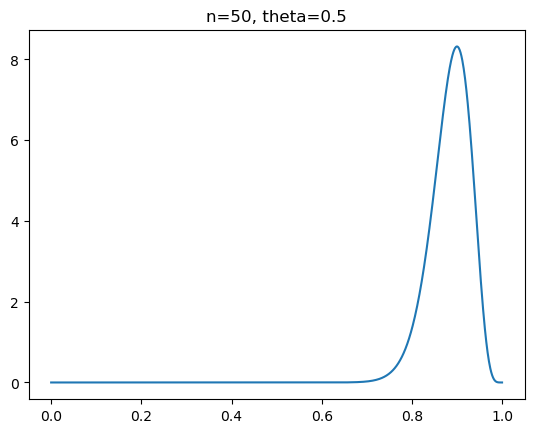

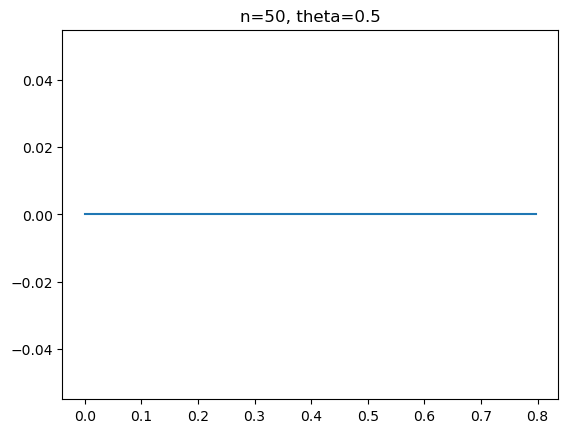

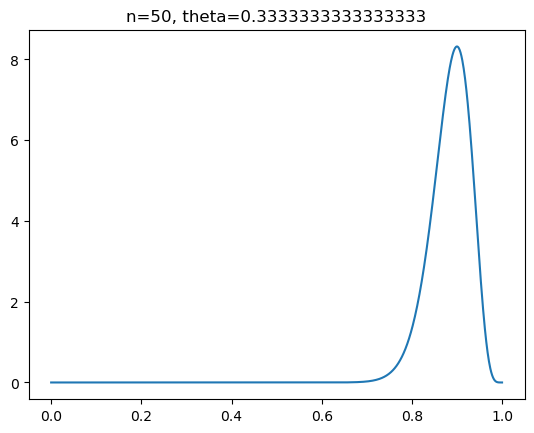

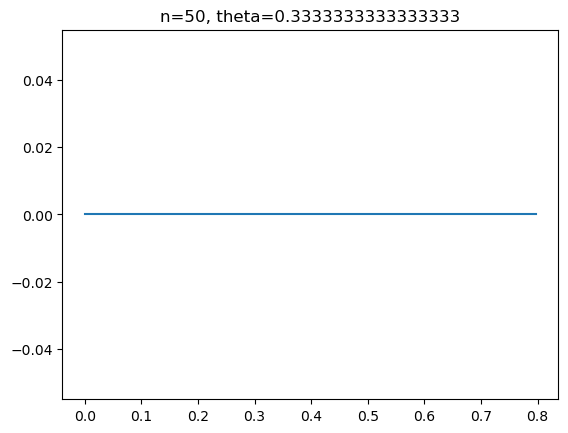

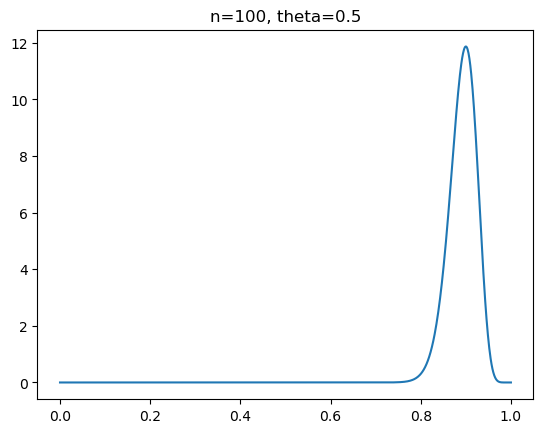

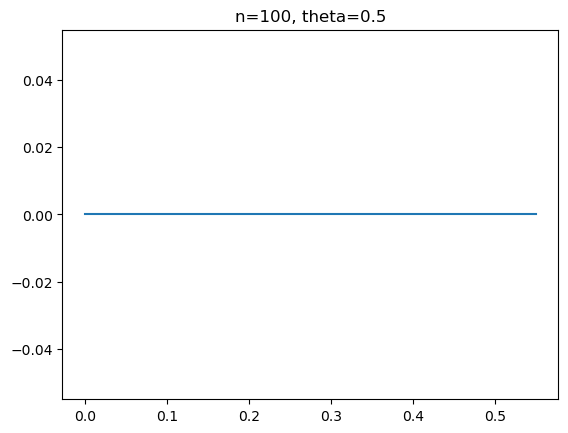

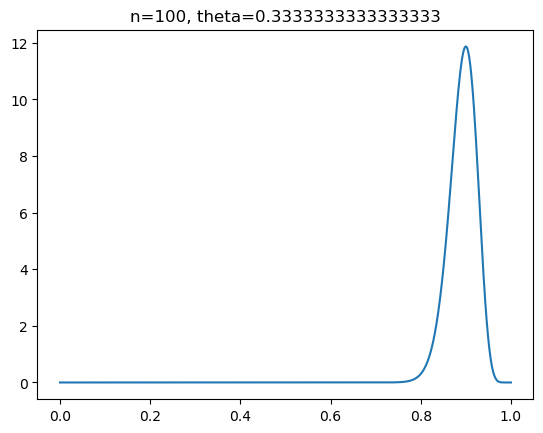

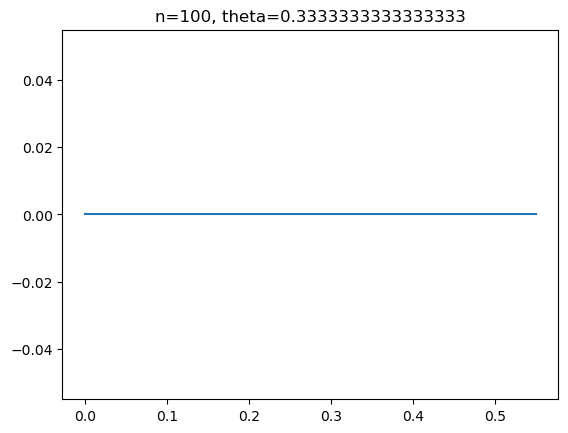

In [20]:
nmas=[5,10,20,50,100]
thetamas=[0.5,1/3]
for n in nmas:
	for theta in thetamas:
		for j in range(2):
			X=np.random.binomial(1,theta,n)
			if j==0:
				k=9*n/10
			else:
				k=99*n/10
			x=np.linspace(0,1,1000)
			denominator=spec.beta(n-k+1,k)
			plt.plot(x,x**k*(1-x)**(n-k)/denominator)
			plt.title("n="+str(n)+", theta="+str(theta))
			plt.show()

2. Пусть X1, ..., Xn ∼ N (θ, 1), θ ∼ N (μ, σ2). Апостериорную плотность можно не считать, а взять из таблицы. Посмотрим, как влияют параметры априорного распредления на итоговый результат. Для этого будем генерировать выборки для какого-то одного фиксированного θ (возьмите любое число из [0, 1], а также посмотрите на какое-нибудь θ, близкое к 0 или 1).

(a) Сравнить (визуально на графике) апостериорные плотности для нескольких разных значений (μ, σ2).

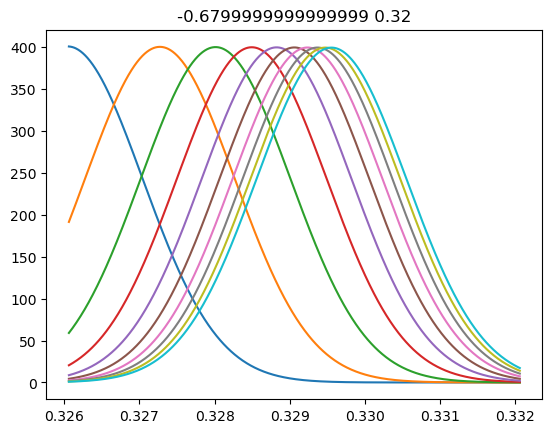

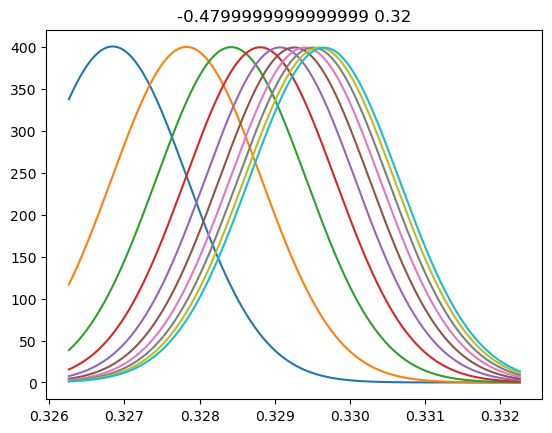

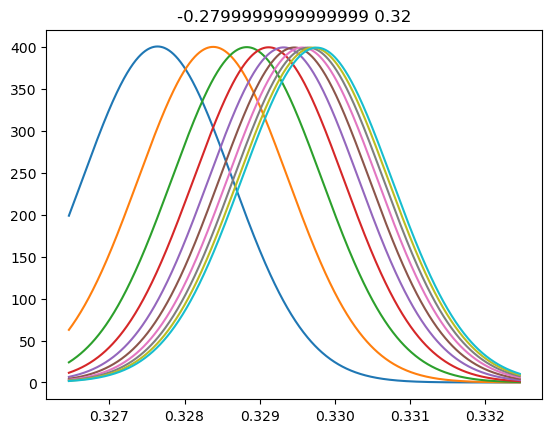

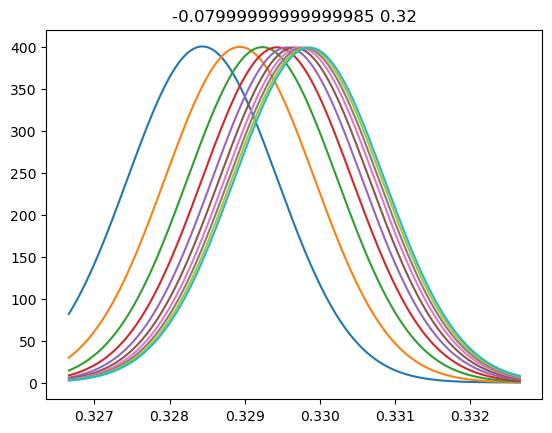

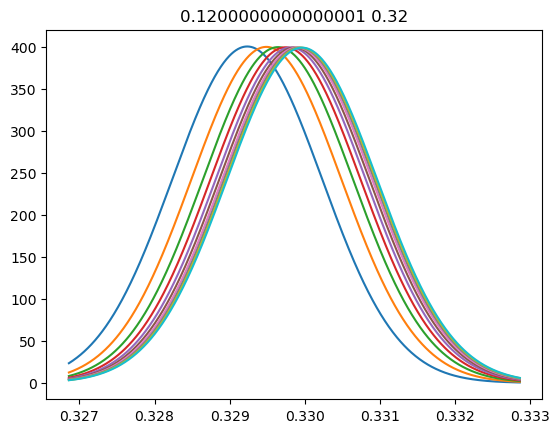

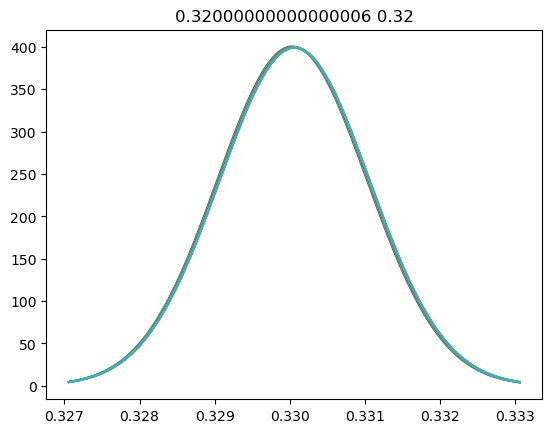

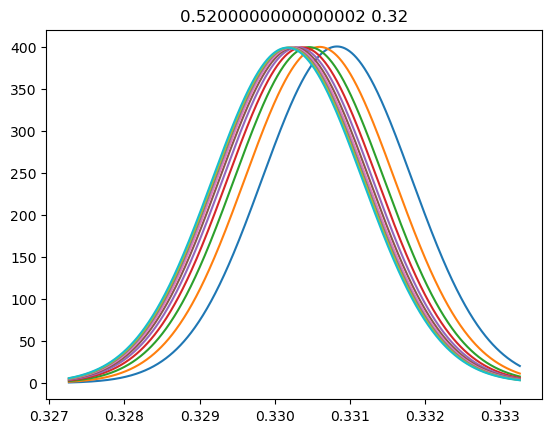

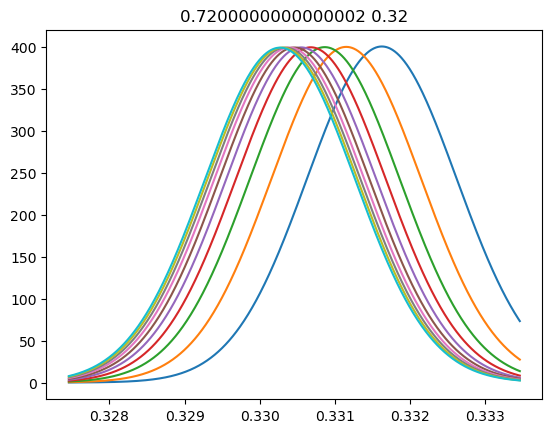

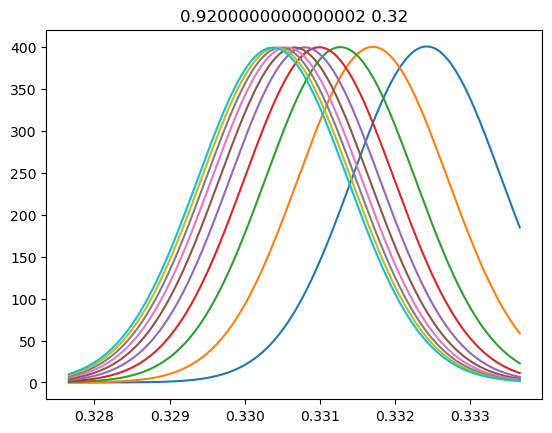

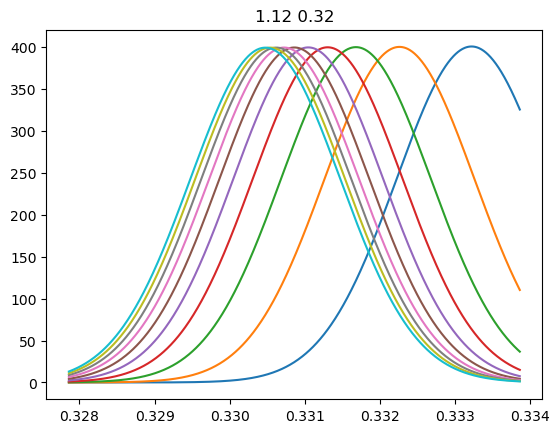

In [4]:
generativemu=float(input())
k=int(input())
X=np.random.normal(size=k,loc=generativemu,scale=1)
sum=np.sum(X)
for i in range(10):
	mu=generativemu-1+0.2*i
	x=np.linspace((mu+sum)/(1+len(X))-3/len(X),(mu+sum)/(1+len(X))+3/len(X),1000)
	for j in range(10):
		sd=0.5+j/10
		plt.plot(x,st.norm.pdf(x,(mu/sd**2+sum)/(1/sd**2+len(X)),1/(1/sd**2+len(X))))
		plt.title(str(mu)+' '+str(generativemu))
	plt.show()

(b) Построить пример, когда при n = 10000 оценка θ достаточно сильно отличается от настоящего значения несмотря на размер выборки.

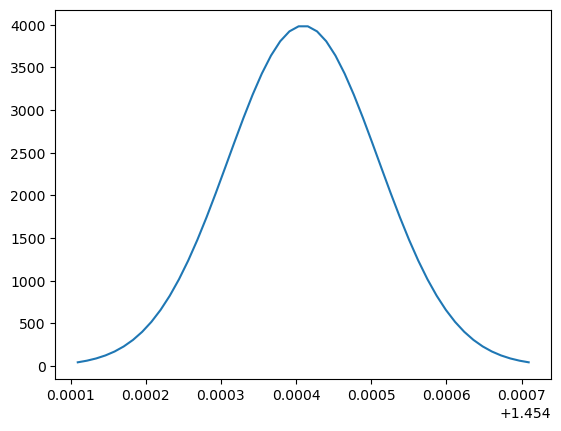

In [47]:
generativemu=float(input())
X=np.random.normal(size=10000,loc=generativemu,scale=1)
sum=np.sum(X)
mu=100000
sd=1
x=np.linspace((mu/sd**2+sum)/(1/sd**2+len(X))-3/(1/sd**2+len(X)),(mu/sd**2+sum)/(1/sd**2+len(X))+3/(1/sd**2+len(X)))
plt.plot(x,st.norm.pdf(x,(mu/sd**2+sum)/(1/sd**2+len(X)),1/(1/sd**2+len(X))))
plt.show()

(c) Сравнить байесовские оценки для квадратичного риска при разных (μ, σ2).

In [48]:
generativemu=float(input())
k=int(input())
X=np.random.normal(size=k,loc=generativemu,scale=1)
sum=np.sum(X)
for i in range(10):
	mu=generativemu-1+0.2*i
	x=np.linspace((mu+sum)/(1+len(X))-3/len(X),(mu+sum)/(1+len(X))+3/len(X),1000)
	for j in range(10):
		sd=0.5+j/10
		print((mu/sd**2+sum)/(1/sd**2+len(X)))

0.35330545472199065
0.354540508461818
0.3552866629430357
0.355771533519754
0.35610422687806614
0.3563423342066719
0.35651857854208346
0.3566526677438343
0.356757045153214
0.3568398806833871
0.35410226747099466
0.3550945250823166
0.35569399491859577
0.3560835460002532
0.3563508360026038
0.35654213440647214
0.35668373130839237
0.35679146024903896
0.3568753183643317
0.35694186946462114
0.3548990802199986
0.3556485417028152
0.35610132689415586
0.35639555848075244
0.35659744512714137
0.35674193460627235
0.35684888407470117
0.3569302527542437
0.35699359157544935
0.35704385824585516
0.35569589296900256
0.3562025583233138
0.35650865886971594
0.35670757096125166
0.35684405425167903
0.35694173480607255
0.35701403684101
0.35706904525944844
0.3571118647865671
0.3571458470270893
0.35649270571800656
0.35675657494381247
0.356915990845276
0.3570195834417509
0.35709066337621664
0.3571415350058727
0.3571791896073188
0.35720783776465315
0.3572301379976847
0.3572478358083233
0.35728951846701057
0.35731059

3. X1, ..., Xn ∼ N (θ, 1). Построить (на листочке) байесовский криретерий для проверки H0 : θ = 0
против H1 : θ = 1, если априорная вероятность P(θ = 0) = p. Построить графики зависимости
ошибок 1-го и 2-го рода от p.

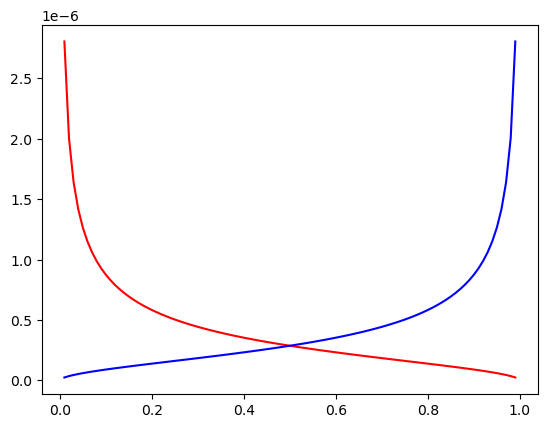

In [7]:
p=np.linspace(0.01,0.99,99)
n=int(input())
plt.plot(p,[1-st.norm.cdf((math.log(i/(1-i))+n/2)/n**0.5,0,1) for i in p],color='red')
plt.plot(p,[st.norm.cdf((math.log(i/(1-i))-n/2)/n**0.5,0,1) for i in p],color='blue')
plt.show()